In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-02-27 06:55:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  19.2MB/s    in 6.7s    

2023-02-27 06:55:30 (15.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Become one with data

In [2]:
import os
for dirnames, dirpath, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirpath)} directories and {len(filenames)} images in {dirnames}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [3]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [4]:
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

import random
def random_imgs (filepath, class_name):
  plt.figure(figsize=(10,7))
  for i in range(4):
    plt.subplot(2,2, i+1)
    target_file = filepath + '/' + class_name
    img = random.choice(os.listdir(target_file))
    img_path = target_file + '/' + img
    image_data = mpimage.imread(img_path)
  
    plt.imshow(image_data)
    plt.axis(False)
    plt.title(class_name + img)


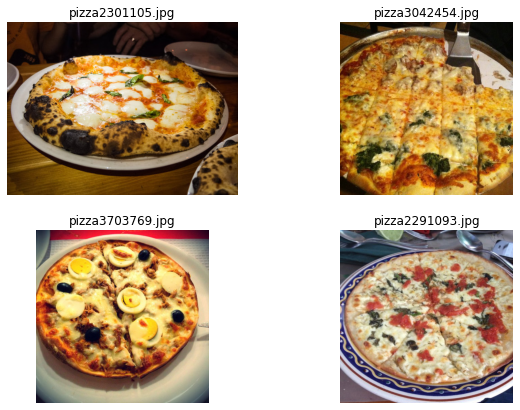

In [5]:
random_imgs(filepath="pizza_steak/train",
            class_name="pizza")

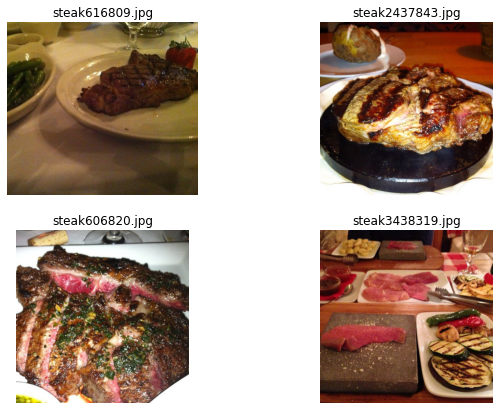

In [6]:
random_imgs(filepath="pizza_steak/train",
            class_name="steak")

## Data Preprocessing

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data_gen = ImageDataGenerator(rescale=1/255.,
                              height_shift_range = 0.2,
                              width_shift_range=0.2,
                              zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=0.2,
                              horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1/255.)

In [62]:
train_data = data_gen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42)

test_data = test_data_gen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [44]:
images,labels = train_data.next()
len(images[0])

224

# Create the model

In [63]:
tf.random.set_seed(42)
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile

In [64]:
model_0.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit The Modle

In [65]:
history_0 = model_0.fit(train_data,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
47/47 [==============================] - 65s 488ms/step - loss: 0.6351 - accuracy: 0.6347 - val_loss: 0.4523 - val_accuracy: 0.7840
Epoch 2/7
47/47 [==============================] - 23s 490ms/step - loss: 0.5182 - accuracy: 0.7467 - val_loss: 0.3723 - val_accuracy: 0.8540
Epoch 3/7
47/47 [==============================] - 23s 497ms/step - loss: 0.4953 - accuracy: 0.7693 - val_loss: 0.4000 - val_accuracy: 0.8680
Epoch 4/7
47/47 [==============================] - 24s 490ms/step - loss: 0.4626 - accuracy: 0.8007 - val_loss: 0.3199 - val_accuracy: 0.8640
Epoch 5/7
47/47 [==============================] - 24s 505ms/step - loss: 0.4694 - accuracy: 0.7873 - val_loss: 0.3121 - val_accuracy: 0.8600
Epoch 6/7
47/47 [==============================] - 23s 488ms/step - loss: 0.4408 - accuracy: 0.8107 - val_loss: 0.2979 - val_accuracy: 0.8860
Epoch 7/7
47/47 [==============================] - 23s 490ms/step - loss: 0.4244 - accuracy: 0.8140 - val_loss: 0.2966 - val_accuracy: 0.8700


In [34]:
def plot_history(history):
  loss = np.array(history.history['loss'])
  acc = np.array(history.history['accuracy'])

  val_loss = np.array(history.history['val_loss'])
  val_acc = np.array(history.history["val_accuracy"])

  epochs = np.array(range(len(loss))) + 1

  plt.figure(figsize=(12,7))
  plt.plot(epochs, loss, label="Loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss vs Valid Loss")
  plt.legend()
  
  plt.figure(figsize=(12,7))
  plt.plot(epochs, acc, label="Acc")
  plt.plot(epochs, val_acc, label="Validation Acc")
  plt.title("Acc VS Val Acc")
  plt.legend()

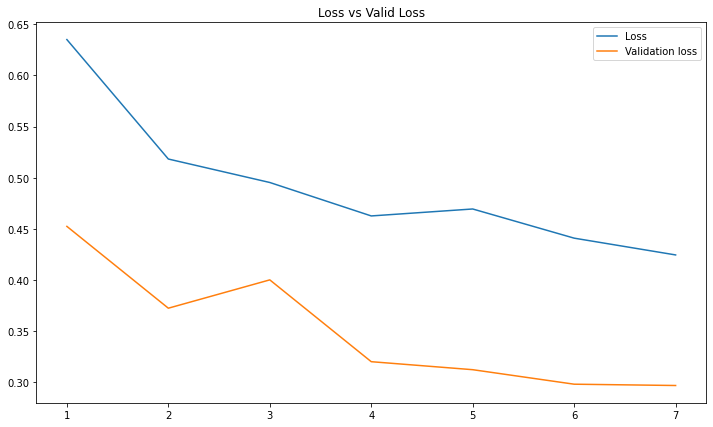

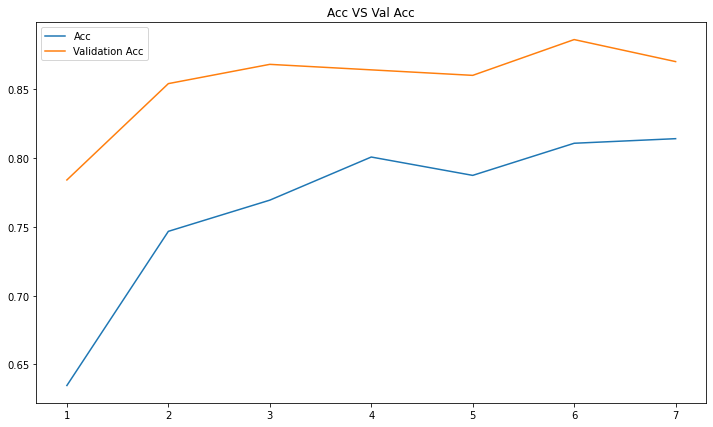

In [66]:
plot_history(history_0)

## Predict

In [67]:
def load_prep_img(filepath, imgsize=224):
  img=tf.io.read_file(filepath)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img, size=[imgsize, imgsize])
  img=img / 255
  return img

In [75]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-27 07:43:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-02-27 07:43:35 (144 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



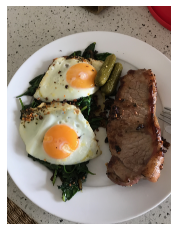

In [76]:
import matplotlib.image as mpimg



steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [78]:
img = load_prep_img(filepath='03-steak.jpeg')
y_pred= model_0.predict(tf.expand_dims(img, axis=0))
tf.round(y_pred)

1/1 [==============================] - 0s 207ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

--2023-02-27 07:41:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-27 07:41:59 (205 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



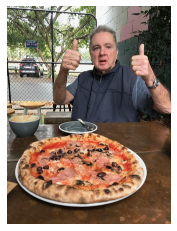

In [73]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(pizza)
plt.axis(False);

In [79]:
img2 = load_prep_img(filepath="03-pizza-dad.jpeg")
y_pred= model_0.predict(tf.expand_dims(img2, axis=0))
tf.round(y_pred)

1/1 [==============================] - 0s 20ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

# Multi Class Classification CNN

## Load Data

In [83]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-27 07:51:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.2MB/s    in 22s     

2023-02-27 07:51:57 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [84]:
## walk throug
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [89]:
train_dir2 = "10_food_classes_all_data/train/"
test_dir2 = "10_food_classes_all_data/test/"

In [90]:
## Get the names
import pathlib as path
dir = path.Path(train_dir2)
class_names = np.array(sorted([item.name for item in dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

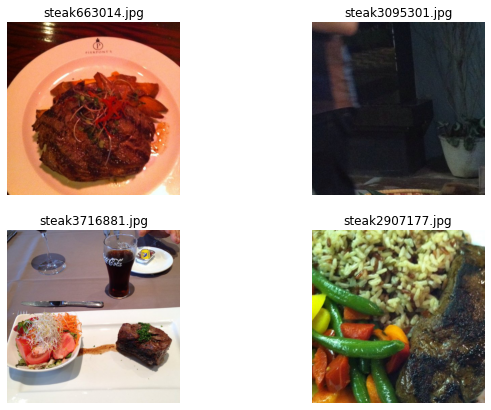

In [94]:
# Plot random img\
import random
random_imgs(filepath=train_dir2,
            class_name=random.choice(class_names))

## Preprocess Data

In [95]:
train_data_gen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)
test_data_gen=  ImageDataGenerator(rescale=1/255.)

In [97]:
train_data = train_data_gen.flow_from_directory(train_dir2,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=True,
                                                seed=42)
test_data = test_data_gen.flow_from_directory(train_dir2,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


## Create A model